In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
## import data
path = 'data/heart.csv'
heart_df = pd.read_csv(path)
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
heart_df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [5]:
# there are four different chest pain types
heart_df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [6]:
# three different resting ecg responses
heart_df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [7]:
# three st_slope values
heart_df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [8]:
# One hot encoding of categorical data values:
heart_df_encoded= pd.get_dummies(heart_df)
heart_df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [9]:
# Define input data and target:
X = heart_df_encoded.drop('HeartDisease', axis=1)
y = heart_df_encoded['HeartDisease']

In [10]:
# Train, test, split:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Apply standard scaling:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# View scaled data:
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.239292,1.183802,1.307314,1.877849,0.551672,1.900458,-0.537019,0.537019,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-1.182037,1.182037,-0.254981,0.962897,-0.851064
1,0.239292,1.183802,-1.878000,-0.532524,-1.486343,-0.834739,-0.537019,0.537019,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,-1.225487,2.023931,0.845997,-0.845997,-0.254981,0.962897,-0.851064
2,0.558968,0.913811,0.096522,1.877849,0.831400,0.624033,-0.537019,0.537019,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,0.816002,-0.494088,0.845997,-0.845997,-0.254981,-1.038533,1.174999
3,-0.293501,-0.166155,-0.210833,-0.532524,-1.446382,-0.834739,-0.537019,0.537019,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,0.845997,-0.845997,-0.254981,-1.038533,1.174999
4,0.345851,-0.166155,0.990645,-0.532524,-1.526304,0.076994,1.862131,-1.862131,-1.104244,-0.480384,-0.530275,4.683304,-0.505445,0.816002,-0.494088,0.845997,-0.845997,-0.254981,0.962897,-0.851064


In [13]:
# Create Random Forest Model:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

# Check the accuracy:
train_score = rfc.score(X_train_scaled, y_train)
test_score = rfc.score(X_test_scaled, y_test)
print(f"Train Score = {train_score:.3f}, Test Score = {test_score:.3f}")

Train Score = 1.000, Test Score = 0.891


In [ ]:
# Display the confusion matrix:
from sklearn.metrics import confusion_matrix


<AxesSubplot:title={'center':'Most Influential Features for Scaled Random Forest Model\nScore: 0.891'}>

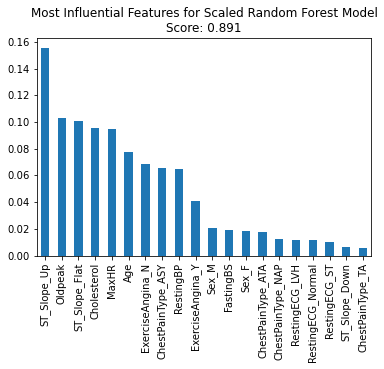

In [24]:
# Display the important features graph:
RFfeature_importance = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
RFfeature_importance[0:20].plot(kind='bar',
                                 title=f'Most Influential Features for Scaled Random Forest Model\nScore: {test_score:.3f}')

In [14]:
# Save model and scaler to files:
import pickle

filename1 = 'rfc_model.pkl'
filename2 = 'rfc_scaler.pkl'
pickle.dump(rfc, open(filename1, 'wb'))
pickle.dump(X_scaler, open(filename2, 'wb'))
print(f"Model saved to file: {filename1}")
print(f"Scaler saved to file: {filename2}")

Model saved to file: rfc_model.pkl
Scaler saved to file: rfc_scaler.pkl


In [15]:
# Load saved model and scaler from files:
import pickle

model_file = 'rfc_model.pkl'
scaler_file = 'rfc_scaler.pkl'
loaded_model = pickle.load(open(model_file, 'rb'))
loaded_scaler = pickle.load(open(scaler_file, 'rb'))
print(f"Model loaded from file: {model_file}")
print(f"Scaler loaded from file: {scaler_file}")

Model loaded from file: rfc_model.pkl
Scaler loaded from file: rfc_scaler.pkl


In [19]:
# Make some testing data for a fictitious patient:
Age = 65
Sex = "M"
ChestPainType = "ATA"
RestingBP = 185
Cholesterol = 235
FastingBS = 0
RestingECG = "Normal"
MaxHR = 150
ExerciseAngina = "Y"
Oldpeak = 1.5
ST_Slope = "Flat"

# Create column headers to match the ones in heart_df_encoded:
column_headers = ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak",
                  "Sex_F","Sex_M",
                  "ChestPainType_ASY","ChestPainType_ATA","ChestPainType_NAP","ChestPainType_TA",
                  "RestingECG_LVH","RestingECG_Normal","RestingECG_ST",
                  "ExerciseAngina_N","ExerciseAngina_Y",
                  "ST_Slope_Down","ST_Slope_Flat","ST_Slope_Up"]

# Put the testing data into a row:
data_row = []
data_row.append(Age)
data_row.append(RestingBP)
data_row.append(Cholesterol)
data_row.append(FastingBS)
data_row.append(MaxHR)
data_row.append(Oldpeak)
if Sex == "F":
    data_row.append(1)
    data_row.append(0)
else:
    data_row.append(0)
    data_row.append(1)
if ChestPainType == "ASY":
    data_row.append(1)
    data_row.append(0)
    data_row.append(0)
    data_row.append(0)
elif ChestPainType == "ATA":
    data_row.append(0)
    data_row.append(1)
    data_row.append(0)
    data_row.append(0)
elif ChestPainType == "NAP":
    data_row.append(0)
    data_row.append(0)
    data_row.append(1)
    data_row.append(0)    
else:
    data_row.append(0)
    data_row.append(0)
    data_row.append(0)
    data_row.append(1)
if RestingECG == "LVH":
    data_row.append(1)
    data_row.append(0)
    data_row.append(0)
elif RestingECG == "Normal":
    data_row.append(0)
    data_row.append(1)
    data_row.append(0)
else:
    data_row.append(0)
    data_row.append(0)
    data_row.append(1)
if ExerciseAngina == "N":
    data_row.append(1)
    data_row.append(0)
else:
    data_row.append(0)
    data_row.append(1)
if ST_Slope == "Down":
    data_row.append(1)
    data_row.append(0)
    data_row.append(0)
elif ST_Slope == "Flat":
    data_row.append(0)
    data_row.append(1)
    data_row.append(0)
else:
    data_row.append(0)
    data_row.append(0)
    data_row.append(1)
    
# Create a single row dataframe to pass as input to the model:
input_data = pd.DataFrame([data_row], columns=column_headers)
input_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,65,185,235,0,150,1.5,0,1,0,1,0,0,0,1,0,0,1,0,1,0


In [20]:
# Scale the input data: 
input_data_scaled = loaded_scaler.transform(input_data)

# Get prediction from model:
y = loaded_model.predict(input_data_scaled)
if y == 1:
    print("You are at risk for having a heart attack.")
else:
    print("You are not at risk for having a heart attack.")

You are at risk for having a heart attack.
